In [2]:
#importing libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")


In [3]:
train_dir = "D:/AML/Data/train"
test_dir = "D:/AML/Data/test"

In [4]:
def load_images(path):
    images = []
    labels = []
    for label in os.listdir(path):
        for file in os.listdir(os.path.join(path, label)):
            img_path = os.path.join(path, label, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (200, 200))
            images.append(img.flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

In [6]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (675, 40000)
Testing data shape: (315, 40000)


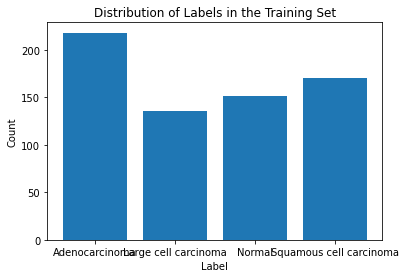

In [7]:
import matplotlib.pyplot as plt
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.title("Distribution of Labels in the Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

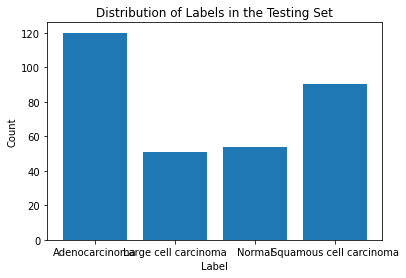

In [8]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.title("Distribution of Labels in the Testing Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
oversampler = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

In [11]:
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

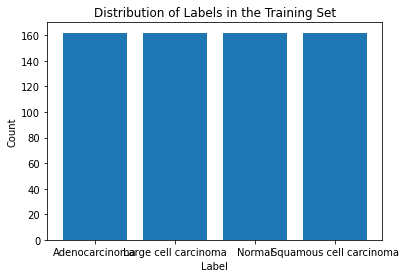

In [12]:
import matplotlib.pyplot as plt
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.title("Distribution of Labels in the Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Dimensionality reduction
pca = PCA(n_components=100, random_state=42)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

In [15]:
mod =[]
acc =[]

In [16]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [17]:
test_preds = random_forest.predict(X_test)
rf_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",rf_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(rf_acc)
mod.append('Random forest')

Accuracy:  0.8444444444444444
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.85      0.84      0.85        56
   Large cell carcinoma       0.79      0.73      0.76        26
                 Normal       1.00      1.00      1.00        19
Squamous cell carcinoma       0.78      0.85      0.82        34

               accuracy                           0.84       135
              macro avg       0.86      0.86      0.86       135
           weighted avg       0.85      0.84      0.84       135

Confusion matrix:  [[47  4  0  5]
 [ 4 19  0  3]
 [ 0  0 19  0]
 [ 4  1  0 29]]


In [18]:
# Logistic Regression

logreg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [19]:
test_preds = logreg.predict(X_test)
lg_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",lg_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(lg_acc)
mod.append('Logistic regression')

Accuracy:  0.8074074074074075
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.81      0.79      0.80        56
   Large cell carcinoma       0.78      0.69      0.73        26
                 Normal       0.83      1.00      0.90        19
Squamous cell carcinoma       0.80      0.82      0.81        34

               accuracy                           0.81       135
              macro avg       0.81      0.83      0.81       135
           weighted avg       0.81      0.81      0.81       135

Confusion matrix:  [[44  3  3  6]
 [ 6 18  1  1]
 [ 0  0 19  0]
 [ 4  2  0 28]]


In [20]:
#SVM
from sklearn.svm import SVC,LinearSVC
from sklearn.svm import SVC
from sklearn import svm

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [21]:
test_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",svm_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(svm_acc)
mod.append('SVM')

Accuracy:  0.837037037037037
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.78      0.88      0.82        56
   Large cell carcinoma       0.90      0.69      0.78        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.84      0.79      0.82        34

               accuracy                           0.84       135
              macro avg       0.87      0.84      0.85       135
           weighted avg       0.84      0.84      0.84       135

Confusion matrix:  [[49  1  1  5]
 [ 8 18  0  0]
 [ 0  0 19  0]
 [ 6  1  0 27]]


In [22]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
alpha = 0.1
model = GaussianNB(var_smoothing=alpha)
model.fit(X_train,y_train)


GaussianNB(var_smoothing=0.1)

In [23]:
test_preds = model.predict(X_test)
nb_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",nb_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(nb_acc)
mod.append('Naive bayes')


Accuracy:  0.5703703703703704
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.55      0.95      0.69        56
   Large cell carcinoma       0.00      0.00      0.00        26
                 Normal       0.75      0.47      0.58        19
Squamous cell carcinoma       0.58      0.44      0.50        34

               accuracy                           0.57       135
              macro avg       0.47      0.47      0.44       135
           weighted avg       0.48      0.57      0.50       135

Confusion matrix:  [[53  0  2  1]
 [17  0  0  9]
 [ 9  0  9  1]
 [18  0  1 15]]


In [24]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='distance')
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [25]:
test_preds = classifier.predict(X_test)
knn_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",knn_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(knn_acc)
mod.append('KNN')

Accuracy:  0.8518518518518519
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.86      0.86      0.86        56
   Large cell carcinoma       0.89      0.62      0.73        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.78      0.94      0.85        34

               accuracy                           0.85       135
              macro avg       0.87      0.85      0.85       135
           weighted avg       0.86      0.85      0.85       135

Confusion matrix:  [[48  1  1  6]
 [ 7 16  0  3]
 [ 0  0 19  0]
 [ 1  1  0 32]]


In [26]:
# Gradient Boosting Machines
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
test_preds = gbm.predict(X_test)
gbm_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",gbm_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(gbm_acc)
mod.append('GBM')

Accuracy:  0.7851851851851852
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.82      0.75      0.79        56
   Large cell carcinoma       0.70      0.54      0.61        26
                 Normal       0.90      1.00      0.95        19
Squamous cell carcinoma       0.72      0.91      0.81        34

               accuracy                           0.79       135
              macro avg       0.79      0.80      0.79       135
           weighted avg       0.79      0.79      0.78       135

Confusion matrix:  [[42  5  2  7]
 [ 7 14  0  5]
 [ 0  0 19  0]
 [ 2  1  0 31]]


In [28]:
# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [29]:
test_preds = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",lgbm_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(lgbm_acc)
mod.append('LightGBM')

Accuracy:  0.8814814814814815
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.91      0.86      0.88        56
   Large cell carcinoma       0.83      0.77      0.80        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.84      0.94      0.89        34

               accuracy                           0.88       135
              macro avg       0.88      0.89      0.89       135
           weighted avg       0.88      0.88      0.88       135

Confusion matrix:  [[48  3  1  4]
 [ 4 20  0  2]
 [ 0  0 19  0]
 [ 1  1  0 32]]


In [30]:
# Neural Networks
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [31]:
test_preds = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",mlp_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(mlp_acc)
mod.append('MLP')

Accuracy:  0.8444444444444444
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.87      0.82      0.84        56
   Large cell carcinoma       0.82      0.69      0.75        26
                 Normal       0.90      1.00      0.95        19
Squamous cell carcinoma       0.79      0.91      0.85        34

               accuracy                           0.84       135
              macro avg       0.85      0.86      0.85       135
           weighted avg       0.85      0.84      0.84       135

Confusion matrix:  [[46  2  2  6]
 [ 6 18  0  2]
 [ 0  0 19  0]
 [ 1  2  0 31]]


In [32]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [33]:
test_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",dt_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(dt_acc)
mod.append('DT')

Accuracy:  0.5703703703703704
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.56      0.41      0.47        56
   Large cell carcinoma       0.43      0.46      0.44        26
                 Normal       0.90      1.00      0.95        19
Squamous cell carcinoma       0.51      0.68      0.58        34

               accuracy                           0.57       135
              macro avg       0.60      0.64      0.61       135
           weighted avg       0.57      0.57      0.56       135

Confusion matrix:  [[23 14  1 18]
 [10 12  0  4]
 [ 0  0 19  0]
 [ 8  2  1 23]]


In [34]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [35]:
test_preds = adaboost.predict(X_test)
adaboost_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",adaboost_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(adaboost_acc)
mod.append('Adaboost')

Accuracy:  0.5777777777777777
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.56      0.62      0.59        56
   Large cell carcinoma       0.42      0.38      0.40        26
                 Normal       1.00      0.89      0.94        19
Squamous cell carcinoma       0.50      0.47      0.48        34

               accuracy                           0.58       135
              macro avg       0.62      0.59      0.61       135
           weighted avg       0.58      0.58      0.58       135

Confusion matrix:  [[35 10  0 11]
 [11 10  0  5]
 [ 0  2 17  0]
 [16  2  0 16]]


In [36]:
#Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gp = GaussianProcessClassifier(kernel=RBF(),random_state=42)
gp.fit(X_train, y_train)


GaussianProcessClassifier(kernel=RBF(length_scale=1), random_state=42)

In [37]:
test_preds = gp.predict(X_test)
gp_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",gp_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(gp_acc)
mod.append('GP')

Accuracy:  0.7407407407407407
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.77      0.73      0.75        56
   Large cell carcinoma       0.61      0.54      0.57        26
                 Normal       0.79      1.00      0.88        19
Squamous cell carcinoma       0.74      0.76      0.75        34

               accuracy                           0.74       135
              macro avg       0.73      0.76      0.74       135
           weighted avg       0.74      0.74      0.74       135

Confusion matrix:  [[41  7  4  4]
 [ 7 14  0  5]
 [ 0  0 19  0]
 [ 5  2  1 26]]


In [38]:
#Extra tree
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)


ExtraTreesClassifier(random_state=42)

In [39]:
test_preds = et.predict(X_test)
et_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",et_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(et_acc)
mod.append('ET')

Accuracy:  0.8592592592592593
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.80      0.91      0.85        56
   Large cell carcinoma       0.84      0.62      0.71        26
                 Normal       1.00      1.00      1.00        19
Squamous cell carcinoma       0.91      0.88      0.90        34

               accuracy                           0.86       135
              macro avg       0.89      0.85      0.86       135
           weighted avg       0.86      0.86      0.86       135

Confusion matrix:  [[51  2  0  3]
 [10 16  0  0]
 [ 0  0 19  0]
 [ 3  1  0 30]]


In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

In [41]:
test_preds = qda.predict(X_test)
qda_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",qda_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)

Accuracy:  0.7851851851851852
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.68      0.98      0.80        56
   Large cell carcinoma       0.81      0.50      0.62        26
                 Normal       1.00      0.79      0.88        19
Squamous cell carcinoma       1.00      0.68      0.81        34

               accuracy                           0.79       135
              macro avg       0.87      0.74      0.78       135
           weighted avg       0.83      0.79      0.78       135

Confusion matrix:  [[55  1  0  0]
 [13 13  0  0]
 [ 4  0 15  0]
 [ 9  2  0 23]]


In [42]:
#Histgradient boosting
from sklearn.ensemble import HistGradientBoostingClassifier
gm = HistGradientBoostingClassifier(random_state=42)
gm.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=42)

In [43]:
test_preds = gm.predict(X_test)
gm_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",gm_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(gm_acc)
mod.append('Hist GB')

Accuracy:  0.8592592592592593
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.89      0.84      0.86        56
   Large cell carcinoma       0.83      0.77      0.80        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.79      0.88      0.83        34

               accuracy                           0.86       135
              macro avg       0.86      0.87      0.87       135
           weighted avg       0.86      0.86      0.86       135

Confusion matrix:  [[47  2  1  6]
 [ 4 20  0  2]
 [ 0  0 19  0]
 [ 2  2  0 30]]


In [44]:
#Cat boost
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state=42)
catboost.fit(X_train, y_train)

Learning rate set to 0.077395
0:	learn: 1.3572054	total: 215ms	remaining: 3m 34s
1:	learn: 1.3218543	total: 278ms	remaining: 2m 18s
2:	learn: 1.2845940	total: 336ms	remaining: 1m 51s
3:	learn: 1.2521694	total: 395ms	remaining: 1m 38s
4:	learn: 1.2298656	total: 458ms	remaining: 1m 31s
5:	learn: 1.2014543	total: 517ms	remaining: 1m 25s
6:	learn: 1.1779512	total: 576ms	remaining: 1m 21s
7:	learn: 1.1523029	total: 633ms	remaining: 1m 18s
8:	learn: 1.1316729	total: 692ms	remaining: 1m 16s
9:	learn: 1.1113903	total: 753ms	remaining: 1m 14s
10:	learn: 1.0892868	total: 797ms	remaining: 1m 11s
11:	learn: 1.0705583	total: 840ms	remaining: 1m 9s
12:	learn: 1.0510014	total: 886ms	remaining: 1m 7s
13:	learn: 1.0350394	total: 935ms	remaining: 1m 5s
14:	learn: 1.0155882	total: 978ms	remaining: 1m 4s
15:	learn: 0.9986054	total: 1.02s	remaining: 1m 2s
16:	learn: 0.9811304	total: 1.06s	remaining: 1m 1s
17:	learn: 0.9643318	total: 1.11s	remaining: 1m
18:	learn: 0.9454075	total: 1.16s	remaining: 59.8s
19:

In [45]:
test_preds = catboost.predict(X_test)
catboost_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",catboost_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(catboost_acc)
mod.append('Catboost')

Accuracy:  0.8888888888888888
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.92      0.86      0.89        56
   Large cell carcinoma       0.81      0.85      0.83        26
                 Normal       1.00      1.00      1.00        19
Squamous cell carcinoma       0.84      0.91      0.87        34

               accuracy                           0.89       135
              macro avg       0.89      0.90      0.90       135
           weighted avg       0.89      0.89      0.89       135

Confusion matrix:  [[48  4  0  4]
 [ 2 22  0  2]
 [ 0  0 19  0]
 [ 2  1  0 31]]


In [46]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)


BaggingClassifier(random_state=42)

In [47]:
test_preds = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",bagging_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(bagging_acc)
mod.append('Bagging')

Accuracy:  0.7037037037037037
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.74      0.62      0.68        56
   Large cell carcinoma       0.54      0.54      0.54        26
                 Normal       0.83      1.00      0.90        19
Squamous cell carcinoma       0.69      0.79      0.74        34

               accuracy                           0.70       135
              macro avg       0.70      0.74      0.72       135
           weighted avg       0.70      0.70      0.70       135

Confusion matrix:  [[35 10  3  8]
 [ 8 14  0  4]
 [ 0  0 19  0]
 [ 4  2  1 27]]


In [48]:
#Stacking classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = SVC(random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf5 = LGBMClassifier(random_state=42)
clf6 =  HistGradientBoostingClassifier(random_state=42)
clf7 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
clf8 = MLPClassifier(random_state=42)


final_estimator = LogisticRegression(random_state=42)


stacking = StackingClassifier(estimators=[('rf', clf1), ('lr', clf2), ('svc', clf3),('et',clf4),('lg',clf5),('hg',clf6),('nc',clf7),('mp',clf8)], final_estimator=final_estimator)


stacking.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('et', ExtraTreesClassifier(random_state=42)),
                               ('lg', LGBMClassifier(random_state=42)),
                               ('hg',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('nc',
                                KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance')),
                               ('mp', MLPClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [49]:
test_preds = stacking.predict(X_test)
stacking_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",stacking_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(stacking_acc)
mod.append('Stacking')

Accuracy:  0.9185185185185185
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.91      0.91      0.91        56
   Large cell carcinoma       0.88      0.81      0.84        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.94      0.97      0.96        34

               accuracy                           0.92       135
              macro avg       0.92      0.92      0.92       135
           weighted avg       0.92      0.92      0.92       135

Confusion matrix:  [[51  2  1  2]
 [ 5 21  0  0]
 [ 0  0 19  0]
 [ 0  1  0 33]]


In [50]:
#Voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = SVC(random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf5 = LGBMClassifier(random_state=42)
clf6 =  HistGradientBoostingClassifier(random_state=42)
clf7 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
clf8 = MLPClassifier(random_state=42)




final_estimator = LogisticRegression(random_state=42)

voting = VotingClassifier(estimators=[ ('rf',clf1),('lr', clf2), ('svc', clf3),('et',clf4),('lg',clf5),('hg',clf6),('nc',clf7),('mp',clf8)])


voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('lg', LGBMClassifier(random_state=42)),
                             ('hg',
                              HistGradientBoostingClassifier(random_state=42)),
                             ('nc',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('mp', MLPClassifier(random_state=42))])

In [51]:
test_preds = voting.predict(X_test)
voting_acc = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
print("Accuracy: ",voting_acc)
print("Classification report: ",test_report)
print("Confusion matrix: ",test_cm)
acc.append(voting_acc)
mod.append('Voting')

Accuracy:  0.9111111111111111
Classification report:                           precision    recall  f1-score   support

         Adenocarcinoma       0.88      0.95      0.91        56
   Large cell carcinoma       0.90      0.73      0.81        26
                 Normal       0.95      1.00      0.97        19
Squamous cell carcinoma       0.94      0.94      0.94        34

               accuracy                           0.91       135
              macro avg       0.92      0.90      0.91       135
           weighted avg       0.91      0.91      0.91       135

Confusion matrix:  [[53  1  1  1]
 [ 6 19  0  1]
 [ 0  0 19  0]
 [ 1  1  0 32]]


In [52]:
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(),
    MLPClassifier(),
    
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GaussianProcessClassifier(),
    ExtraTreesClassifier(),
    QuadraticDiscriminantAnalysis(),
    HistGradientBoostingClassifier(),
    
    BaggingClassifier(),
    StackingClassifier(estimators=[('rf', clf1), ('lr', clf2), ('svc', clf3),('et',clf4),('lg',clf5),('hg',clf6),('nc',clf7),('mp',clf8)], final_estimator=final_estimator),
    VotingClassifier(estimators=[ ('rf',clf1),('lr', clf2), ('svc', clf3),('et',clf4),('lg',clf5),('hg',clf6),('nc',clf7),('mp',clf8)])
]


for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=3)
    avg_score = scores.mean()
    std_score = scores.std()
    print(f"Model: {type(model).__name__}")
    print(f"Average Score: {avg_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")
    print("----------------------")


Model: RandomForestClassifier
Average Score: 0.7948
Standard Deviation: 0.0221
----------------------
Model: LogisticRegression
Average Score: 0.7299
Standard Deviation: 0.0315
----------------------
Model: SVC
Average Score: 0.7716
Standard Deviation: 0.0252
----------------------
Model: GaussianNB
Average Score: 0.5540
Standard Deviation: 0.0115
----------------------
Model: KNeighborsClassifier
Average Score: 0.7099
Standard Deviation: 0.0208
----------------------
Model: GradientBoostingClassifier
Average Score: 0.7793
Standard Deviation: 0.0273
----------------------
Model: LGBMClassifier
Average Score: 0.8117
Standard Deviation: 0.0252
----------------------
Model: MLPClassifier
Average Score: 0.7423
Standard Deviation: 0.0153
----------------------
Model: DecisionTreeClassifier
Average Score: 0.6127
Standard Deviation: 0.0079
----------------------
Model: AdaBoostClassifier
Average Score: 0.4769
Standard Deviation: 0.0549
----------------------
Model: GaussianProcessClassifier
A

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

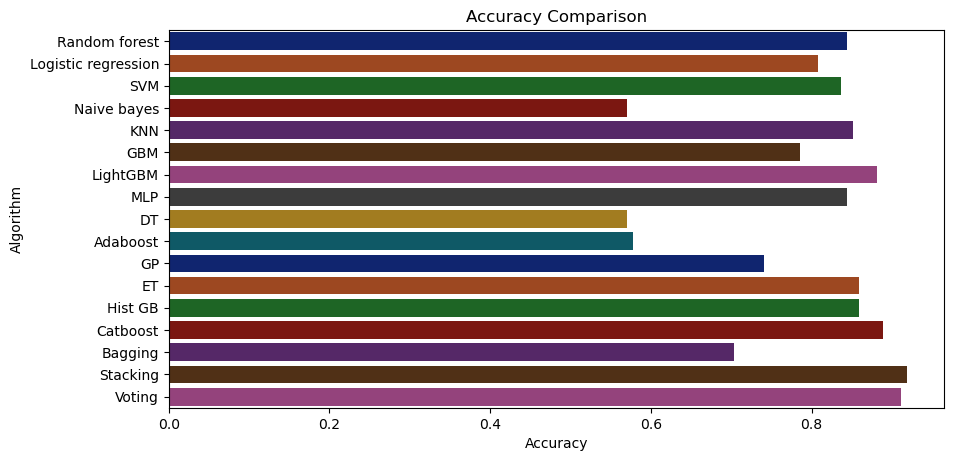

In [53]:
import seaborn as sns
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = mod,palette='dark')

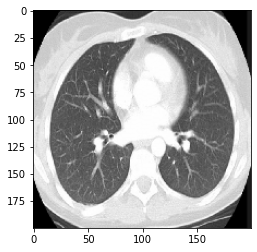

In [54]:
#images from other sources than this dataset
import matplotlib.pyplot as plt
new_image = cv2.imread("D:/FDS/Data/lung normal.png", cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (200, 200))
new_image = new_image.flatten()
plt.imshow(new_image.reshape(200, 200), cmap='gray')
plt.show()


In [55]:
new_image_scaled = scaler.transform([new_image])
new_image = pca.transform(new_image_scaled)

In [56]:
prediction = voting.predict(new_image)
print(prediction) 

['Normal']


In [57]:
prediction = random_forest.predict(new_image)
print(prediction) 

['Normal']


In [58]:
prediction = lgbm.predict(new_image)
print(prediction) 

['Normal']


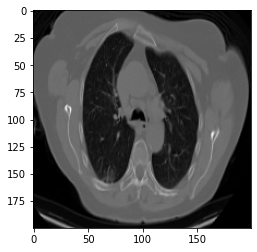

In [60]:
new_image1 = cv2.imread("D:/FDS/Data/000005 (9).png", cv2.IMREAD_GRAYSCALE)
new_image1 = cv2.resize(new_image1, (200, 200))
new_image1 = new_image1.flatten()
plt.imshow(new_image1.reshape(200, 200), cmap='gray')
plt.show()

In [61]:
new_image_scaled = scaler.transform([new_image1])
new_image_scaled = pca.transform(new_image_scaled)
prediction = stacking.predict(new_image_scaled)
print(prediction)

['Adenocarcinoma']


In [62]:
new_image_scaled = scaler.transform([new_image1])
new_image_scaled = pca.transform(new_image_scaled)
prediction = voting.predict(new_image_scaled)
print(prediction)

['Adenocarcinoma']


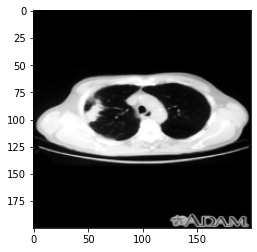

In [63]:
new_image1 = cv2.imread("D:/FDS/Data/1637.jpg", cv2.IMREAD_GRAYSCALE)
new_image1 = cv2.resize(new_image1, (200, 200))
new_image1 = new_image1.flatten()
plt.imshow(new_image1.reshape(200, 200), cmap='gray')
plt.show()

In [64]:
new_image_scaled = scaler.transform([new_image1])
new_image_scaled = pca.transform(new_image_scaled)
prediction = stacking.predict(new_image_scaled)
print(prediction)

['Squamous cell carcinoma']


In [65]:
new_image_scaled = scaler.transform([new_image1])
new_image_scaled = pca.transform(new_image_scaled)
prediction = catboost.predict(new_image_scaled)
print(prediction)

[['Squamous cell carcinoma']]


In [66]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM Model', "KNN","GBM","LGBM","MLP","DT","Adaboost","Gaussian process","Extra tree","QDA","Hist GBM","Catboost","Bagging","Stacking","Voting",],
    
    'Test Score': [ lg_acc, nb_acc, rf_acc,svm_acc,knn_acc,gbm_acc,lgbm_acc,mlp_acc,dt_acc,adaboost_acc,gp_acc,et_acc,qda_acc,gm_acc,catboost_acc,bagging_acc,stacking_acc,voting_acc]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
16,Stacking,0.918519
17,Voting,0.911111
14,Catboost,0.888889
6,LGBM,0.881481
11,Extra tree,0.859259
13,Hist GBM,0.859259
4,KNN,0.851852
2,Random Forest,0.844444
7,MLP,0.844444
3,SVM Model,0.837037
